In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint


In [4]:
AUDUSD_df = pd.read_csv('cointegrated_pairs_data/AUDUSD_df.csv')
NZDUSD_df = pd.read_csv('cointegrated_pairs_data/NZDUSD_df.csv')


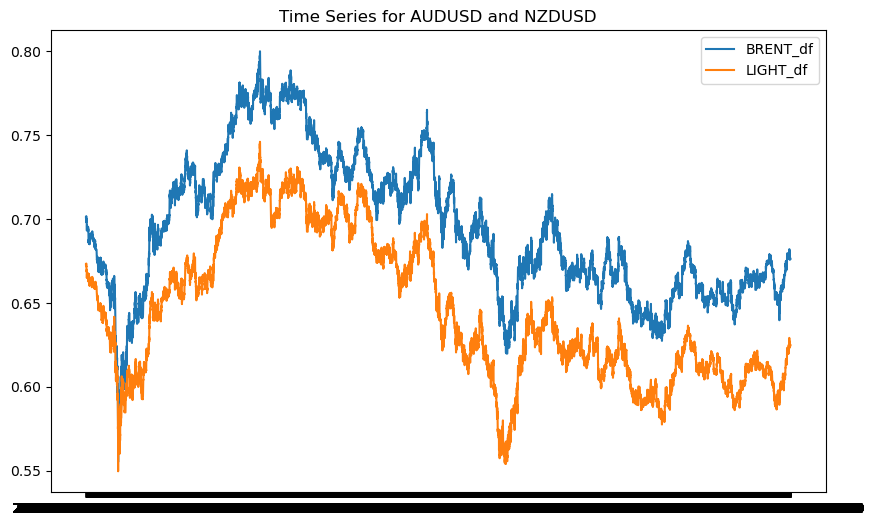

In [6]:
# Plot both time series
plt.figure(figsize=(10, 6))
plt.plot(AUDUSD_df['Time'], AUDUSD_df['Close'], label='BRENT_df')
plt.plot(NZDUSD_df['Time'], NZDUSD_df['Close'], label='LIGHT_df')
plt.title('Time Series for AUDUSD and NZDUSD')
plt.legend()
plt.show()

In [10]:
# Now for 4-H first we have to resample the dataset for that we have to do the following tests -->
# Convert 'Time' columns to datetime for resampling
AUDUSD_df['Time'] = pd.to_datetime(AUDUSD_df['Time'])
NZDUSD_df['Time'] = pd.to_datetime(NZDUSD_df['Time'])

In [11]:
AUDUSD_df.set_index('Time', inplace=True)
NZDUSD_df.set_index('Time', inplace=True)

In [12]:
audusd_4h = AUDUSD_df['Close'].resample('4H').mean()
nzdusd_4h = NZDUSD_df['Close'].resample('4H').mean()

In [13]:
merged_df = pd.concat([audusd_4h, nzdusd_4h], axis=1).dropna()


In [16]:
merged_df.columns = ['AUDUSD_close', 'NZDUSD_close']
merged_df

,AUDUSD_close,NZDUSD_close
Time,,
2020-01-01 00:00:00,0.70115,0.673040
2020-01-01 04:00:00,0.70115,0.673040
2020-01-01 08:00:00,0.70115,0.673040
2020-01-01 12:00:00,0.70115,0.673040
2020-01-01 16:00:00,0.70124,0.673162
...,...,...
2024-08-31 04:00:00,0.67638,0.624840
2024-08-31 08:00:00,0.67638,0.624840
2024-08-31 12:00:00,0.67638,0.624840


In [19]:
coint_result = coint(merged_df['AUDUSD_close'], merged_df['NZDUSD_close'])

# Display the cointegration test results (t-statistic, p-value, and critical values)
print(f'Test Statistic: {coint_result[0]}')
print(f'P-Value: {coint_result[1]}')
print(f'Critical Values: {coint_result[2]}')

Test Statistic: -3.300992241699739
P-Value: 0.054598764850619125
Critical Values: [-3.89751099 -3.3367274  -3.04486465]


<h3>Interpretation --> <br>
<h6> The test statistic (-3.30) is more negative than the 10% critical value (-3.0449), indicating some level of cointegration at the 10% significance level. <br>
The test statistic is slightly above the 5% critical value (-3.3367), meaning the evidence for cointegration at the 5% level is weak.<br>
The p-value (0.0546) suggests a moderate probability of cointegration, but it doesn't pass the 5% threshold, implying that while there is a relationship, it's not very strong.<br>
But, the correlation between AUDUSD_close and NZDUSD_close is 0.9575. Suggesting they will move in same way over the given period of time.


<h1>Performing on 1-D Timeframe


In [21]:
audusd_1D = AUDUSD_df['Close'].resample('1D').mean()
nzdusd_1D = NZDUSD_df['Close'].resample('1D').mean()
merged_df_1d = pd.concat([audusd_1D, nzdusd_1D], axis=1).dropna()
merged_df_1d.columns = ['AUDUSD_close', 'NZDUSD_close']
coint_result_1d = coint(merged_df_1d['AUDUSD_close'], merged_df_1d['NZDUSD_close'])

# Display the cointegration test results (t-statistic, p-value, and critical values)
print(f'Test Statistic: {coint_result_1d[0]}')
print(f'P-Value: {coint_result_1d[1]}')
print(f'Critical Values: {coint_result_1d[2]}')

Test Statistic: -3.217172847837928
P-Value: 0.06710258106289738
Critical Values: [-3.90287872 -3.33971809 -3.0469399 ]


<h3>Interpretation -->
<h6>The test statistic (-3.2172) is below the 10% critical value (-3.0469), suggesting weak evidence of cointegration at the 10% significance level.<br>
The p-value (0.0671) is above the 5% threshold, indicating that the evidence for cointegration is not strong at more conventional significance levels (like 5%).<br>
There is weak evidence of cointegration between AUDUSD and NZDUSD on a daily (1D) timeframe at the 10% level, but it's not strong enough for a higher level of confidence.

<h1>Question --> 

<h4> Answer --> <br>
<h6>Benefits of Stronger Cointegration on the 4-Hour Timeframe:<br>
More Frequent Trading Opportunities:<br>
<br>
With a 4-hour timeframe, you get more data points, which could help identify short-term trading opportunities that might be missed on the 1-day timeframe.<br>
Cointegrated pairs tend to revert to their mean relationship faster in shorter timeframes, allowing for quicker trades.<br>
Better for Short-Term Strategies:<br>
<br>
A 4-hour timeframe is suitable for traders looking to capitalize on short-term fluctuations. If you're running a pairs trading strategy, mean reversion is more likely to happen in shorter timeframes with higher cointegration.<br>
Greater Sensitivity to Market Changes:<br>
<br>
The 4-hour timeframe can capture shorter-term market dynamics and trends, making it more responsive to shifts in market conditions compared to a 1-day timeframe.<br>
More Granular Data:<br>
<br>
More data points in a shorter timeframe help refine the model and increase precision, giving traders more actionable signals when monitoring pair relationships.<br>
Conclusion:<br>
The 4-hour (4H) timeframe shows stronger cointegration for the AUDUSD vs NZDUSD pair. This suggests that for mean-reversion strategies, the 4H timeframe would be more effective in identifying opportunities and responding to market changes, especially for short-term trading.<br>